In [5]:
%pylab inline 
from scipy.integrate import solve_ivp #for vector forms
from scipy import integrate
import seaborn as sns
import ipywidgets as ipw
from numba import jit,njit
import multiprocessing
import pyplnoise

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [92]:
#params
t = np.linspace(0,1000,10000)
w_2 =0.1 ;u = [0,1] ; g=1e-2;w=1;A=1

#gauss- normal distributison
@jit
def harmonic_oscillator(t,u):
    eta=random.normal(0,1) 
    sol_har = [u[1],-w_2 *u[0]+eta]
    return sol_har

@jit
def damped_oscillator(t,u):
    eta=random.normal(0,1)
    sol_dam = [u[1],(-g*u[1]-w_2*u[0])+eta]
    return sol_dam

@jit
def driven_oscillator(t,u):
    eta=random.normal(0,1)
    sol_driv = [u[1], A * cos(w* t) - g * u[1] - w_2 * u[0]+eta]
    return sol_driv

#white noise uniform distribution
@jit
def harmonic_oscillator_gauss(t,u):
    eta=random.uniform(0,1) 
    sol_har = [u[1],-w_2 *u[0]+eta]
    return sol_har

@jit
def damped_oscillator_gauss(t,u):
    eta=random.uniform(0,1)
    sol_dam = [u[1],(-g*u[1]-w_2*u[0])+eta]
    return sol_dam

@jit
def driven_oscillator_gauss(t,u):
    eta=random.uniform(0,1)
    sol_driv = [u[1], A * cos(w* t) - g * u[1] - w_2 * u[0]+eta]
    return sol_driv

#white noise filtering with coefficients to create pink noise
@jit
def pink():
    coef1 = [0.09922035, -0.095993537, 0.050612699, -0.004408786]
    coef2 = [1, -2.494956002, 2.017265875, -0.522189400]

    pink_noise = np.random.uniform(0,1)
    pink_noise = np.convolve(pink_noise, coef1)
    pink_noise = np.convolve(pink_noise, coef2, mode='valid')
    return pink_noise / 0.091420942


@jit(forceobj=True)
def harmonic_oscillator_p(t,u):
    eta=pink()
    sol_har = [u[1],-w_2 *u[0]+eta]
    return sol_har

@jit(forceobj=True)
def damped_oscillator_p(t,u):
    eta=pink()
    sol_dam = [u[1],(-g*u[1]-w_2*u[0])+eta]
    return sol_dam

@jit(forceobj=True)
def driven_oscillator_p(t,u):
    eta=pink()
    sol_driv = [u[1], A * cos(w* t) - g * u[1] - w_2 * u[0]+eta]
    return sol_driv

SyntaxError: expected ':' (918061132.py, line 6)

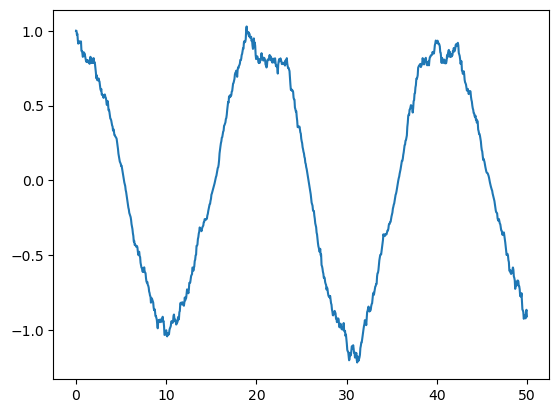

In [10]:
sol_h= solve_ivp(harmonic_oscillator, [0,1000], y0 = u, t_eval = t)
plt.plot(sol_h.t,sol_h.y[1])

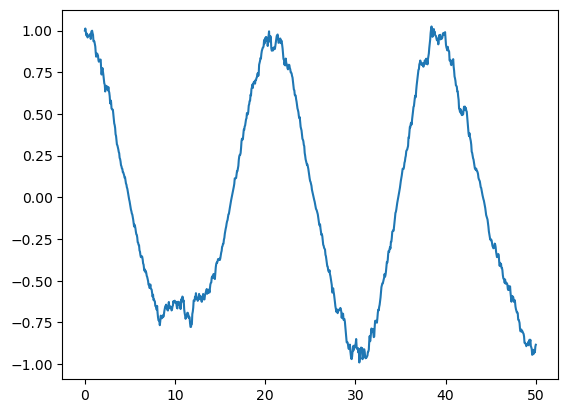

In [11]:
sol_d= solve_ivp(damped_oscillator, [0,1000], y0 = u, t_eval = t) # better parameters! or use multiprocess/ set cpu percent
plt.plot(sol_d.t,sol_d.y[1])

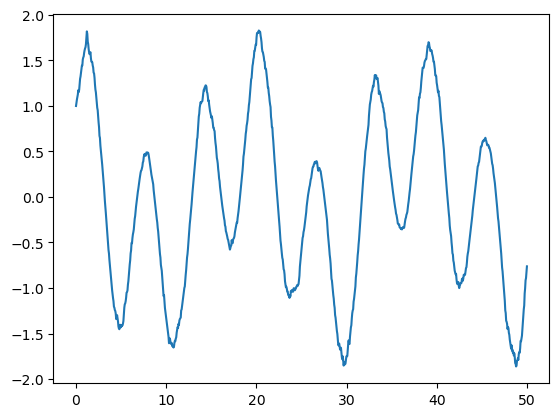

In [12]:
sol_dr= solve_ivp(driven_oscillator, [0,1000], y0 = u, t_eval = t)
plt.plot(sol_dr.t,sol_dr.y[1])

https://medium.com/analytics-vidhya/understanding-oscillators-python-2813ec38781d
https://pypi.org/project/pyplnoise/

## white



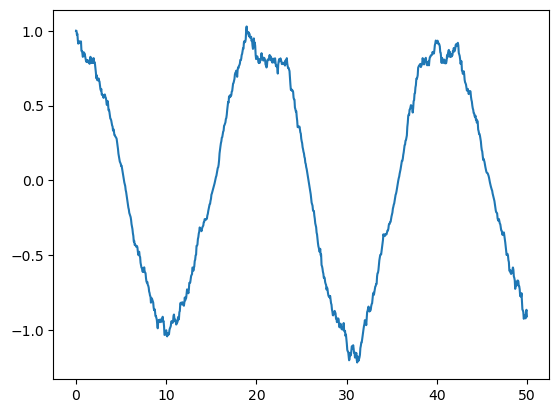

In [15]:
sol_h_g= solve_ivp(harmonic_oscillator_gauss, [0,1000], y0 = u, t_eval = t)
plt.plot(sol_h_g.t,sol_h_g.y[1])

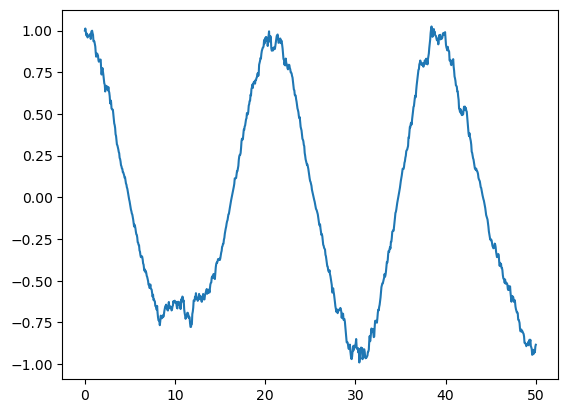

In [16]:
sol_d__g= solve_ivp(damped_oscillator_gauss, [0,1000], y0 = u, t_eval = t) 
plt.plot(sol_d_g.t,sol_d_g.y[1])

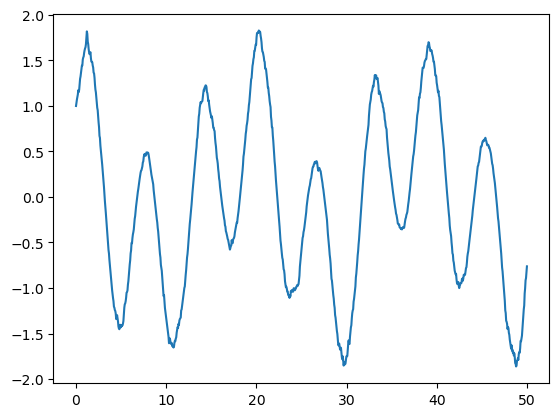

In [17]:
sol_dr_g= solve_ivp(driven_oscillator_gauss, [0,1000], y0 = u, t_eval = t)
plt.plot(sol_dr_g.t,sol_dr_g.y[1])

## pink

C:\Users\weisz\AppData\Local\Temp\ipykernel_7068\124165718.py:48: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "harmonic_oscillator_p" failed type inference due to: No implementation of function Function(<function convolve at 0x000002D794263640>) found for signature:
 
 >>> convolve(float64, list(float64)<iv=None>)
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
      Overload in function 'np_convolve': File: numba\np\arraymath.py: Line 4392.
        With argument(s): '(float64, list(float64)<iv=None>)':
       Rejected as the implementation raised a specific error:
         TypingError: Failed in nopython mode pipeline (step: nopython frontend)
       No implementation of function Function(<built-in function len>) found for signature:
        
        >>> len(float64)
        
       There are 20 candidate implementations:
             - Of which 20 did not match due to:
             Overload of f

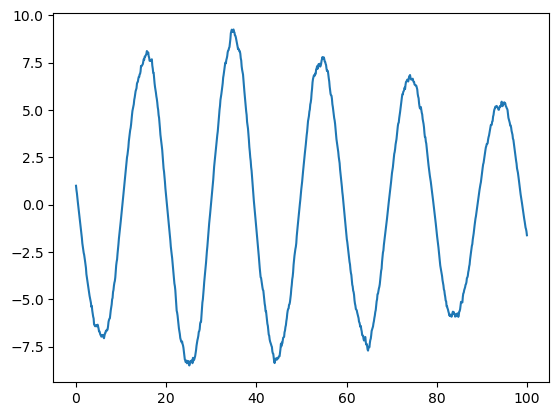

In [89]:
sol_h_p= solve_ivp(harmonic_oscillator_p, [0,1000], y0 = u, t_eval = t)
plt.plot(sol_h_p.t,sol_h_p.y[1])

C:\Users\weisz\AppData\Local\Temp\ipykernel_7068\124165718.py:62: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "damped_oscillator_p" failed type inference due to: No implementation of function Function(<function convolve at 0x000002D794263640>) found for signature:
 
 >>> convolve(float64, list(float64)<iv=None>)
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
      Overload in function 'np_convolve': File: numba\np\arraymath.py: Line 4392.
        With argument(s): '(float64, list(float64)<iv=None>)':
       Rejected as the implementation raised a specific error:
         TypingError: Failed in nopython mode pipeline (step: nopython frontend)
       No implementation of function Function(<built-in function len>) found for signature:
        
        >>> len(float64)
        
       There are 20 candidate implementations:
             - Of which 20 did not match due to:
             Overload of fun

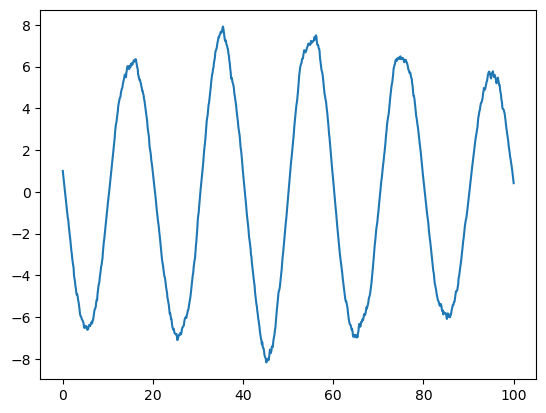

In [90]:
sol_d_p= solve_ivp(damped_oscillator_p, [0,1000], y0 = u, t_eval = t)
plt.plot(sol_d_p.t,sol_d_p.y[1])

C:\Users\weisz\AppData\Local\Temp\ipykernel_7068\124165718.py:76: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "driven_oscillator_p" failed type inference due to: No implementation of function Function(<function convolve at 0x000002D794263640>) found for signature:
 
 >>> convolve(float64, list(float64)<iv=None>)
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
      Overload in function 'np_convolve': File: numba\np\arraymath.py: Line 4392.
        With argument(s): '(float64, list(float64)<iv=None>)':
       Rejected as the implementation raised a specific error:
         TypingError: Failed in nopython mode pipeline (step: nopython frontend)
       No implementation of function Function(<built-in function len>) found for signature:
        
        >>> len(float64)
        
       There are 20 candidate implementations:
             - Of which 20 did not match due to:
             Overload of fun

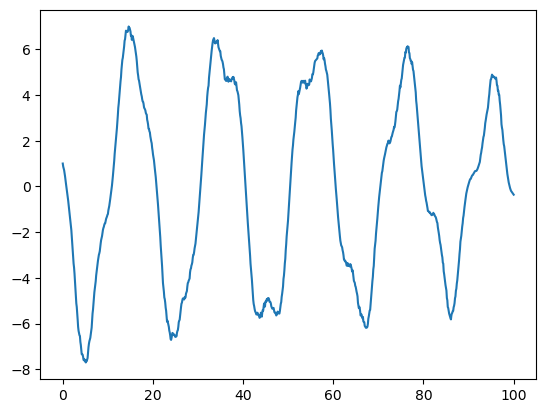

In [91]:
sol_dr_p= solve_ivp(driven_oscillator_p, [0,1000], y0 = u, t_eval = t)
plt.plot(sol_dr_p.t,sol_dr_p.y[1])

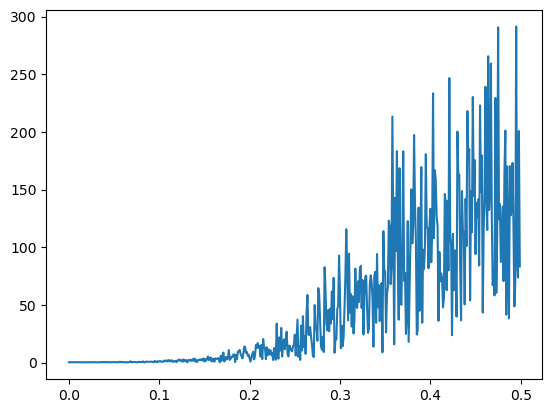

In [66]:
wc = random.uniform(0,1,1000)
w_2 = random.rand
ga= random.normal(0,1,1000)
white_noise_fft = np.fft.fft(wc)
g_fft = np.fft.fft(ga)
# Calculate the corresponding frequencies
sampling_frequency = 1.0  # Assuming a unit sampling frequency
frequencies = np.fft.fftfreq(1000, 1/sampling_frequency)

# Calculate the magnitude of the FFT
white_noise_fft_magnitude = np.abs(white_noise_fft)
g_magnitude = np.abs(g_fft)
#plt.plot(frequencies[1::], white_noise_fft_magnitude[1::])
#plt.plot(frequencies[1::], g_magnitude[1::])
#ylim(0,60)

def pink():
    coef1 = [0.09922035, -0.095993537, 0.050612699, -0.004408786]
    coef2 = [1, -2.494956002, 2.017265875, -0.522189400]

    pink_noise = np.random.uniform(0,1,1000)
    pink_noise = np.convolve(pink_noise, coef1)
    pink_noise = np.convolve(pink_noise, coef2, mode='valid')
    return pink_noise / 0.091420942

pink_noise = pink()

# Compute the frequency spectrum using FFT
spectrum = np.fft.fft(pink_noise)
freq = np.fft.fftfreq(1000)

# Consider only positive frequencies
positive_freq = freq[:1000 // 2]
positive_spectrum = spectrum[:1000 // 2]

#plot(pink_noise)
plot(positive_freq, np.abs(positive_spectrum))